<a href="https://colab.research.google.com/github/dam-crtl/dam-crtl/blob/main/chap9_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [58]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [59]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [60]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
import matplotlib.pyplot as plt

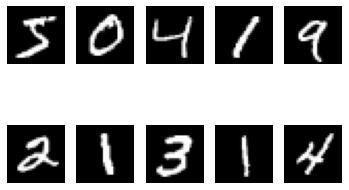

In [62]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i, :, :], cmap='gray')
    plt.axis('off')

In [63]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, dtype=np.float32)
y_train_pre = enc.fit_transform(y_train.reshape(-1, 1))

In [64]:
y_test_pre = enc.fit_transform(y_test.reshape(-1, 1))

In [65]:
X_train_pre = X_train.reshape(X_train.shape[0], -1)
X_train_pre = X_train_pre.astype(np.float32) / 255.0
X_test_pre = X_test.reshape(X_test.shape[0], -1)
X_test_pre = X_test_pre.astype(np.float32) /255.0

In [66]:
import cv2
mlp= cv2.ml.ANN_MLP_create()

In [67]:
mlp.setLayerSizes(np.array([784, 512, 512, 10]))

In [68]:
mlp.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2.5, 1.0)

In [69]:
mlp.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
mlp.setBackpropWeightScale(0.00001)

In [70]:
term_mode = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS)
term_max_iter = 10
term_eps = 0.01
mlp.setTermCriteria((term_mode, term_max_iter, term_eps))

In [71]:
mlp.train(X_train_pre, cv2.ml.ROW_SAMPLE, y_train_pre)

True

In [72]:
_, y_hat_train = mlp.predict(X_train_pre)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat_train.round(), y_train_pre)

0.8539166666666667

In [74]:
_, y_hat_test = mlp.predict(X_test_pre)
accuracy_score(y_hat_test.round(), y_test_pre)

0.8488

#### Kerasを用いてDNNに学習させる

In [75]:
import numpy as np
np.random.seed(1337)

In [76]:
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [77]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [78]:
from keras.utils import np_utils
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [79]:
from keras.models import Sequential
model = Sequential()

In [80]:
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import Flatten, Dense
from keras.layers import MaxPooling2D, Dropout
n_filters = 32
kernel_size = (3, 3)
pool_size=(2, 2)
model.add(Conv2D(n_filters, kernel_size[0], kernel_size[1], padding="valid", input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(n_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

In [81]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [84]:
model.fit(X_train, Y_train, batch_size=128, epochs=12, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/12
469/469 [==============================] - 9s 13ms/step - loss: 2.3021 - accuracy: 0.1037 - val_loss: 2.3008 - val_accuracy: 0.1052
Epoch 2/12
469/469 [==============================] - 6s 12ms/step - loss: 2.3008 - accuracy: 0.1064 - val_loss: 2.2994 - val_accuracy: 0.1058
Epoch 3/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2995 - accuracy: 0.1076 - val_loss: 2.2981 - val_accuracy: 0.1076
Epoch 4/12
469/469 [==============================] - 6s 13ms/step - loss: 2.2982 - accuracy: 0.1093 - val_loss: 2.2969 - val_accuracy: 0.1084
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 2.2975 - accuracy: 0.1101 - val_loss: 2.2956 - val_accuracy: 0.1087
Epoch 6/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2964 - accuracy: 0.1128 - val_loss: 2.2943 - val_accuracy: 0.1096
Epoch 7/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2952 - accuracy: 0.1143 - val_loss: 2.2930 - val_accuracy: 0.1099

In [85]:
model.evaluate(X_test, Y_test, verbose=0)

[2.286376476287842, 0.11180000007152557]